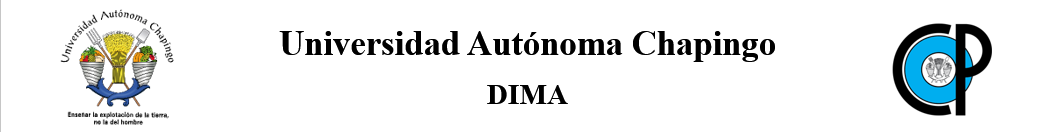

<p style="text-align: justify;"><font face="Times New Roman">Autor: Carlos Ulises Ambrosio Ambrosio</p>

<center><h1><font face="Times New Roman">Álgebra de mapas con Numpy y Scipy</h1></center>
<p style="text-align: justify;"><font face="Times New Roman">El álgebra de mapas es un enfoque fundamental en el procesamiento de imágenes satelitales y en los Sistemas de Información Geográfica (SIG), que implica realizar operaciones matemáticas y lógicas en los datos ráster para obtener nuevas capas de información. En este contexto, NumPy y SciPy son bibliotecas de Python muy útiles que permiten realizar cálculos eficientes y operaciones complejas sobre arrays de datos, lo que es esencial cuando se trabaja con grandes volúmenes de datos ráster.</p>
<h2><font face="Times New Roman">Manipulación de datos con Numpy</h2>
<p style="text-align: justify;"><font face="Times New Roman">Suma y Resta: se pueden sumar o restar valores de píxeles de diferentes bandas para calcular cambios en el tiempo o combinar información.</p>

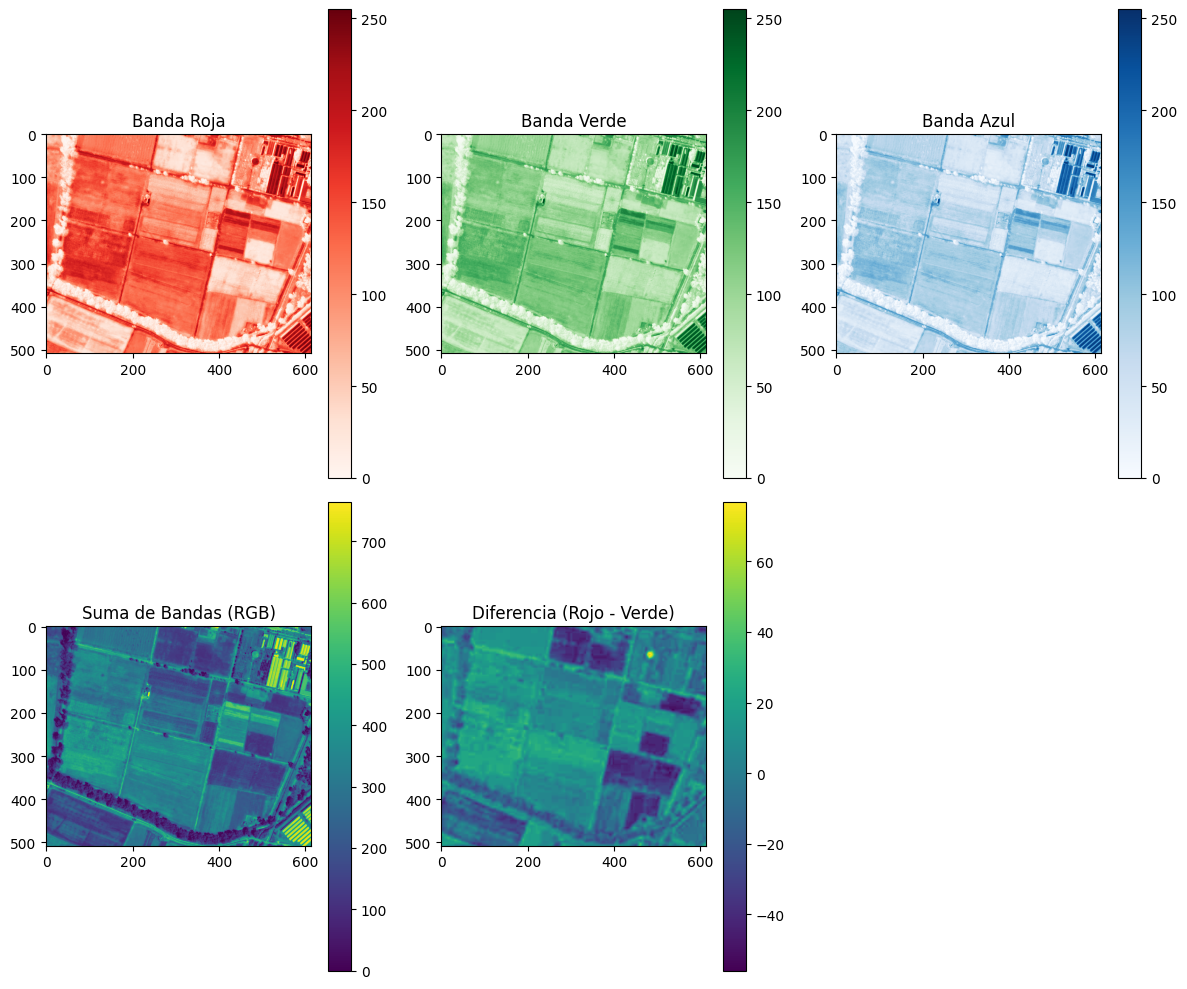

Forma de Banda Roja: (508, 614)
Forma de Banda Verde: (508, 614)
Forma de Banda Azul: (508, 614)
Suma de Bandas (primeros 5 valores): [249. 225. 200. 178. 165.]
Diferencia Rojo - Verde (primeros 5 valores): [ -2.  -4.  -5.  -8. -13.]


In [4]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Leer la imagen TIFF
with rasterio.open('parcela1.tif') as src:
    # Leer las bandas RGB
    band_red = src.read(1)   # Banda Roja
    band_green = src.read(2) # Banda Verde
    band_blue = src.read(3)  # Banda Azul

# Asegúrate de que las bandas tienen el mismo tamaño
assert band_red.shape == band_green.shape == band_blue.shape, "Las bandas deben tener el mismo tamaño."

# Convertir las bandas a arrays de tipo float para evitar problemas de desbordamiento
band_red = band_red.astype(float)
band_green = band_green.astype(float)
band_blue = band_blue.astype(float)

# Sumar las bandas (puedes decidir cómo combinar, aquí sumamos las bandas)
sum_rgb = band_red + band_green + band_blue

# Restar las bandas (ejemplo: Banda Roja - Banda Verde)
diff_rg = band_red - band_green

# Mostrar las bandas originales y los resultados
plt.figure(figsize=(12, 10))

# Banda Roja
plt.subplot(2, 3, 1)
plt.imshow(band_red, cmap='Reds')
plt.title('Banda Roja')
plt.colorbar()

# Banda Verde
plt.subplot(2, 3, 2)
plt.imshow(band_green, cmap='Greens')
plt.title('Banda Verde')
plt.colorbar()

# Banda Azul
plt.subplot(2, 3, 3)
plt.imshow(band_blue, cmap='Blues')
plt.title('Banda Azul')
plt.colorbar()

# Suma de las bandas
plt.subplot(2, 3, 4)
plt.imshow(sum_rgb)
plt.title('Suma de Bandas (RGB)')
plt.colorbar()

# Diferencia entre Banda Roja y Banda Verde
plt.subplot(2, 3, 5)
plt.imshow(diff_rg)
plt.title('Diferencia (Rojo - Verde)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Imprimir las formas de los arrays y sus valores
print("Forma de Banda Roja:", band_red.shape)
print("Forma de Banda Verde:", band_green.shape)
print("Forma de Banda Azul:", band_blue.shape)
print("Suma de Bandas (primeros 5 valores):", sum_rgb.flatten()[:5])
print("Diferencia Rojo - Verde (primeros 5 valores):", diff_rg.flatten()[:5])


<p style="text-align: justify;"><font face="Times New Roman">Multiplicación y División: Estas operaciones pueden ser útiles para normalizar datos, como la conversión de reflectancias a valores de índice.</p>

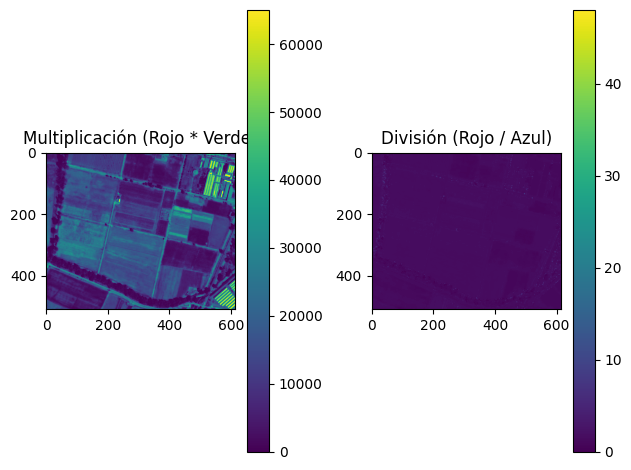

Forma de Banda Roja: (508, 614)
Forma de Banda Verde: (508, 614)
Forma de Banda Azul: (508, 614)
Multiplicación (primeros 5 valores): [8099. 6720. 5396. 4340. 3740.]
División (primeros 5 valores): [1.28985507 1.31147541 1.33962264 1.34782609 1.30952381]


In [10]:
# Convertir las bandas a arrays de tipo float para evitar problemas de desbordamiento
band_red = band_red.astype(float)
band_green = band_green.astype(float)
band_blue = band_blue.astype(float)

# Multiplicar las bandas (ejemplo: Banda Roja * Banda Verde)
mult_rg = band_red * band_green

# Dividir las bandas (ejemplo: Banda Roja / Banda Azul)
# Para evitar la división por cero, se puede usar np.where para manejar esos casos
div_rg = np.divide(band_red, band_blue, out=np.zeros_like(band_red), where=band_blue != 0)

# Multiplicación de las bandas
plt.subplot(1, 2, 1)
plt.imshow(mult_rg)
plt.title('Multiplicación (Rojo * Verde)')
plt.colorbar()

# División de las bandas
plt.subplot(1, 2, 2)
plt.imshow(div_rg)
plt.title('División (Rojo / Azul)')
plt.colorbar()

plt.tight_layout()
plt.show()

# Imprimir las formas de los arrays y sus valores
print("Forma de Banda Roja:", band_red.shape)
print("Forma de Banda Verde:", band_green.shape)
print("Forma de Banda Azul:", band_blue.shape)
print("Multiplicación (primeros 5 valores):", mult_rg.flatten()[:5])
print("División (primeros 5 valores):", div_rg.flatten()[:5])


<p style="text-align: justify;"><font face="Times New Roman">Índices Espectrales: Usando combinaciones de bandas, se pueden calcular índices como:
<p style="text-align: justify;"><font face="Times New Roman"><ul><li>El NDVI (Índice de Vegetación de Diferencia Normalizada) es un índice utilizado para evaluar la salud y la densidad de la vegetación a partir de imágenes satelitales. Es una de las métricas más comunes en teledetección para el análisis de la cobertura vegetal y el monitoreo del medio ambiente.
Se calcula mediante: NDVI= (NIR+R)/(NIR−R), dónde, NIR: Reflectancia en la banda del infrarrojo cercano.R: Reflectancia en la banda roja.</li>
<li>El EVI (Índice de Vegetación Mejorado) es un índice de vegetación diseñado para mejorar la sensibilidad de los datos de vegetación en áreas con alta cobertura de vegetación y para reducir la influencia de la atmósfera y el fondo en la medición de la vegetación. Es especialmente útil en condiciones de alta densidad de vegetación donde otros índices, como el NDVI, pueden saturarse.
Se calcula mediante EVI=G*((NIR-R)/(NIR+C1*R-C2*B+L))
Donde:
NIR: Reflectancia en la banda del infrarrojo cercano.
R: Reflectancia en la banda roja.
B: Reflectancia en la banda azul (utilizada para la corrección atmosférica).
G: Factor de ganancia (comúnmente se establece en 2.5).
C1 y C2: Coeficientes de corrección atmosférica (comúnmente se establecen en 6 y 7.5, respectivamente).
L: Término de ajuste del fondo (se suele establecer en 1).</li>
</ul>

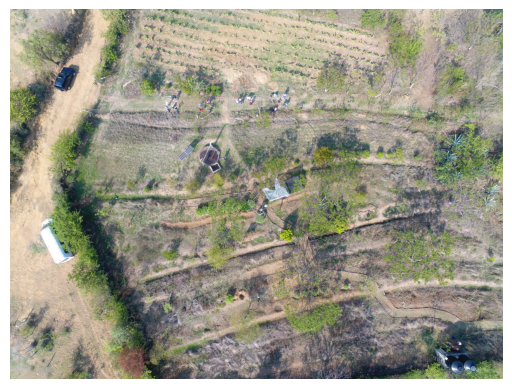

In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
#mostramos la imagen original
with rasterio.open('DJI_0126.JPG') as src:
    # Leer los datos de la imagen
    imagen = src.read()
#mostramos la imagen original
plt.imshow(imagen.transpose(1, 2, 0))  # Transponer para el formato (alto, ancho, canales)
plt.axis('off')  # Ocultar los ejes
plt.show()

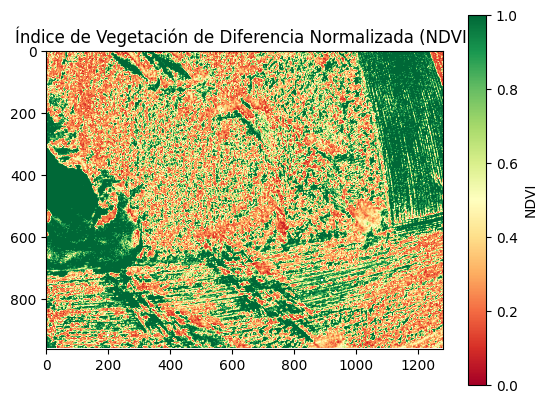

In [14]:

# Abrir la banda NIR (infrarroja cercana)
with rasterio.open('NIR.tif') as nir_src:
    nir_band = nir_src.read(1)

# Abrir la banda roja
with rasterio.open('RED.tif') as red_src:
    red_band = red_src.read(1)

# Evitar división por cero: manejar NaN cuando NIR + Red es cero
np.seterr(divide='ignore', invalid='ignore')

# Calcular el NDVI usando la fórmula (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Configurar valores fuera de rango a NaN o restringir el rango (-1 a 1 para NDVI)
ndvi = np.clip(ndvi, -1, 1)
# Mostrar el NDVI usando Matplotlib
plt.imshow(ndvi, cmap='RdYlGn')  # Colores de rojo (-1) a verde (1)
plt.colorbar(label='NDVI')
plt.title('Índice de Vegetación de Diferencia Normalizada (NDVI)')
plt.show()

<h2><font face="Times New Roman">Cáculo local, focal, zonal y global</h2>
<p style="text-align: justify;"><font face="Times New Roman">Los cálculos locales son operaciones realizadas en el contexto del análisis geoespacial que se aplican a los datos de un único píxel o entidad a la vez, sin considerar la información de los píxeles o entidades adyacentes. Estos cálculos permiten extraer o modificar información basándose exclusivamente en el valor de un píxel específico y su atributo asociado. Dentro de la aplicación de los análisis locales tenemos el cáculo de de varios índices para tares como distinguir entre tierra quemada y no quemada, el NDVI (que se mencionó anteriormente), medición del nitrógeno conenido en la vegetación, etc.</p>
<p style="text-align: justify;"><font face="Times New Roman">Los análisis focales son técnicas utilizadas en el campo del geoprocesamiento y la teledetección para evaluar cómo las características de un área influyen en su entorno inmediato. Estos análisis se centran en el comportamiento local de los datos ráster, considerando la información de un píxel y sus vecinos cercanos para extraer información relevante.</p>
<p style="text-align: justify;"><font face="Times New Roman">Principales características de los cálculos focales:
<ul><li>Escala local: El análisis focal se enfoca en una pequeña vecindad alrededor de cada píxel, lo que permite evaluar cambios y patrones a nivel local.
<li>Operaciones sobre vecindades: Utiliza técnicas como promedios, sumas, máximos, mínimos, varianza, entre otros, aplicando estas operaciones a los píxeles dentro de una ventana definida.</li>
<li>Ventanas móviles: Se puede definir una ventana de diferentes tamaños y formas (cuadrada, circular, etc.) para realizar el análisis en función del contexto del problema.</li>
</ul>

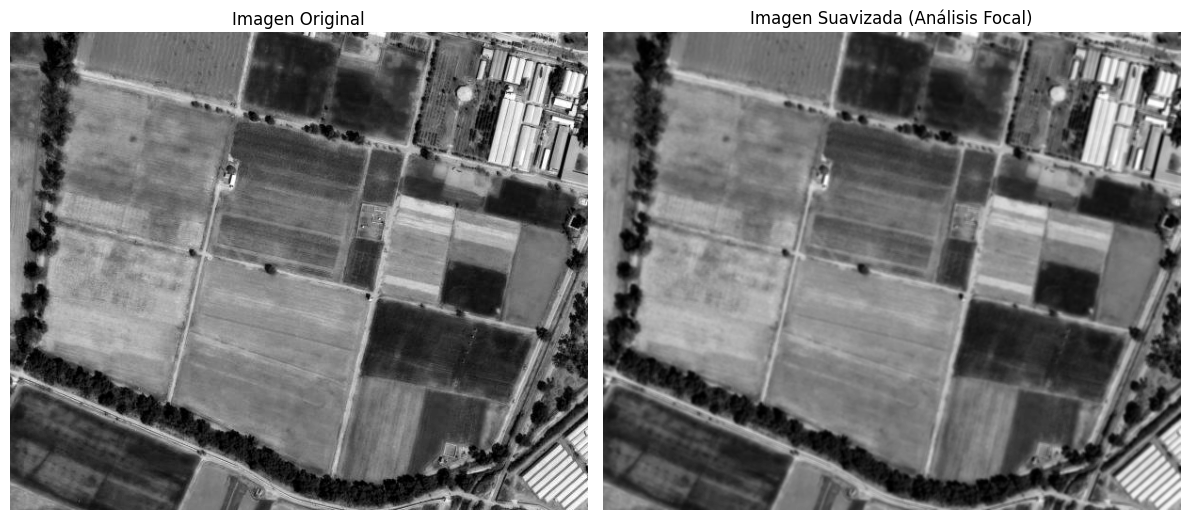

In [16]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

# Definir la función de filtro que calcula el promedio
def mean_filter(values):
    return np.mean(values)

# Abrir el archivo raster original
with rasterio.open('parcela1.tif') as src:
    original = src.read(1)  # Leer la primera banda
    meta = src.meta  # Guardar los metadatos para usarlos más tarde

# Aplicar el análisis focal (promedio en una vecindad 3x3)
suavizado = generic_filter(original, mean_filter, size=3)

# Guardar el resultado en un nuevo archivo raster
meta.update({
    'dtype': 'float32',  # Cambiar el tipo de dato si es necesario
    'count': 1  # Número de bandas
})

with rasterio.open('suavizado.tif', 'w', **meta) as dst:
    dst.write(suavizado, 1)

# Mostrar las imágenes original y suavizada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Mostrar la imagen original
ax[0].imshow(original, cmap='gray')
ax[0].set_title('Imagen Original')
ax[0].axis('off')  # Ocultar los ejes

# Mostrar la imagen suavizada
ax[1].imshow(suavizado, cmap='gray')
ax[1].set_title('Imagen Suavizada (Análisis Focal)')
ax[1].axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()

<p style="text-align: justify;"><font face="Times New Roman">El análisis zonal es una técnica en el ámbito del geoprocesamiento que implica la evaluación de datos geoespaciales en función de áreas o zonas definidas. A diferencia del análisis local, que se centra en el valor de un solo píxel, el análisis zonal considera todos los píxeles dentro de una zona específica y permite realizar cálculos estadísticos o análisis sobre ellos.</p>
<p style="text-align: justify;"><font face="Times New Roman">Se pueden realizar diversas estadísticas sobre los píxeles dentro de cada zona, como:
<ul><li>Promedio</li><li>Suma</li><li>Máximo y mínimo</li><li>Desviación estandar</li>
</ul>

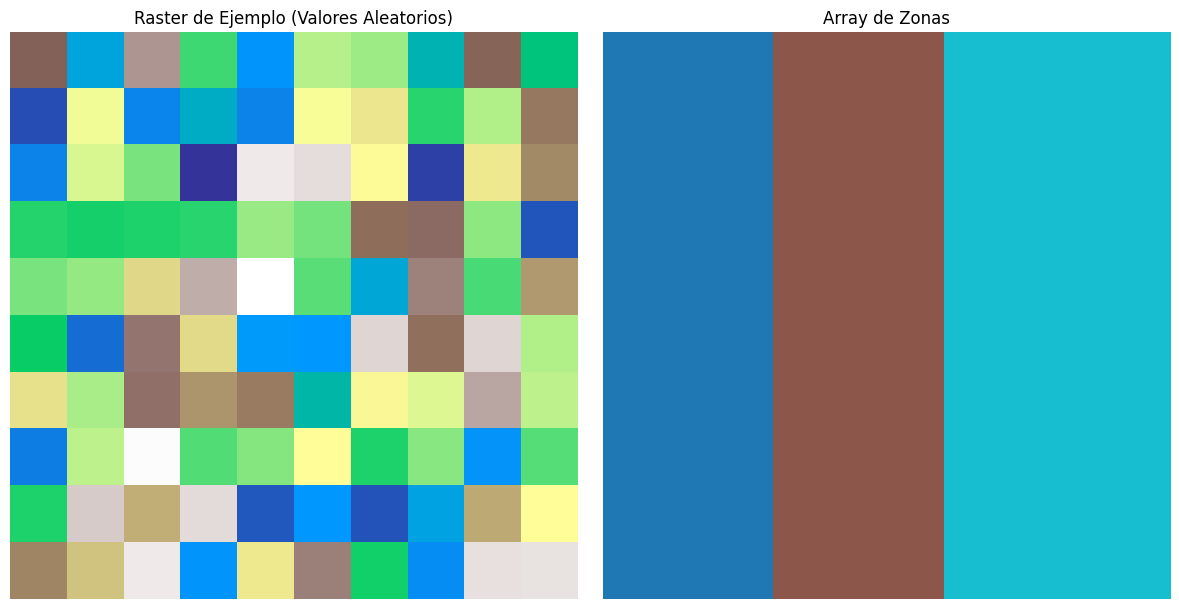

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#Primero, vamos a crear un raster de ejemplo y un array de zonas.
# Crear un raster de ejemplo (10x10)
raster = np.random.rand(10, 10) * 100  # Raster con valores aleatorios entre 0 y 100

# Crear un array de zonas (10x10) con valores de zona
# Zonas: 1, 2 y 3 (por ejemplo)
zones = np.array([[1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3],
                  [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]])

# Visualizar el raster y las zonas
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(raster, cmap='terrain')
ax[0].set_title('Raster de Ejemplo (Valores Aleatorios)')
ax[0].axis('off')

ax[1].imshow(zones, cmap='tab10')
ax[1].set_title('Array de Zonas')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [19]:
#Ahora vamos a calcular el promedio de los valores del raster para cada zona.
# Obtener los valores únicos de las zonas
unique_zones = np.unique(zones)

# Crear un diccionario para almacenar los promedios
mean_values = {}

# Calcular el promedio para cada zona
for zone in unique_zones:
    # Obtener los valores del raster para la zona actual
    zone_values = raster[zones == zone]
    # Calcular el promedio y almacenarlo
    mean_values[zone] = np.mean(zone_values)

# Mostrar los resultados
for zone, mean in mean_values.items():
    print(f'Zona: {zone}, Promedio de Píxeles: {mean:.2f}')


Zona: 1, Promedio de Píxeles: 46.76
Zona: 2, Promedio de Píxeles: 43.90
Zona: 3, Promedio de Píxeles: 48.14


<p style="text-align: justify;"><font face="Times New Roman">Los cálculos globales en el contexto del geoprocesamiento se refieren a operaciones que se aplican a todos los píxeles de una imagen o a todos los elementos de un conjunto de datos en su totalidad, en lugar de hacerlo de manera local (es decir, en píxeles individuales o en zonas específicas). Estos cálculos consideran toda la extensión de los datos y son útiles para obtener estadísticas generales o transformaciones de datos que afecten a toda la superficie analizada.</p>
<p style="text-align: justify;"><font face="Times New Roman">Características de los Cálculos Globales:
<ul><li>Aplicación Universal: Los cálculos globales se aplican a todos los píxeles o entidades, sin distinción, lo que permite obtener resultados a nivel general.</li><li>Estadísticas Generales: Se pueden calcular estadísticas como promedios, sumas, máximos, mínimos, etc., que describen el comportamiento general de un conjunto de datos.</li><li>Transformaciones de Datos: Permiten aplicar transformaciones a todo el dataset, como normalización, escalado o conversión de unidades.</li><li>Visualización y Comparación: Los resultados de cálculos globales son útiles para comparaciones entre diferentes datasets o para la visualización de tendencias a gran escala.</li></ul>

In [20]:
import rasterio
import numpy as np

# Abrir el archivo raster
with rasterio.open('parcela1.tif') as src:
    # Leer la primera banda del raster
    data = src.read(1)

# Calcular el promedio global
global_mean = np.mean(data)

# Mostrar el resultado
print(f'Promedio global de la imagen: {global_mean:.2f}')


Promedio global de la imagen: 106.09


<h2><font face="Times New Roman">Remuestreo de datos</h2>
<p style="text-align: justify;"><font face="Times New Roman">El remuestreo de datos (o resampling) es un proceso utilizado en el análisis de datos geoespaciales, particularmente con imágenes y datos ráster, para cambiar la resolución espacial de un conjunto de datos. Esto implica ajustar la cantidad de píxeles (o celdas) de la imagen o dataset sin alterar su extensión geográfica. El remuestreo puede ser necesario por diversas razones, como la fusión de imágenes con diferentes resoluciones, el ajuste de datos a un formato estándar o la optimización de procesamiento.</p>
<p style="text-align: justify;"><font face="Times New Roman">Existen varios métodos de remuestreo dependiendo de cómo se interpola la información en los nuevos píxeles:
<ul><li>Cercano vecino (Nearest Neighbor): El valor del nuevo píxel toma el valor del píxel más cercano en la imagen original.Ideal para datos categóricos o discretos, como mapas de clasificación de uso del suelo.</li><li>Bilineal (Bilinear Interpolation):Calcula el valor del nuevo píxel como un promedio ponderado de los cuatro píxeles más cercanos.Adecuado para datos continuos, como imágenes de elevación o de temperatura.</li><li>Interpolación cúbica (Cubic Convolution): Utiliza un promedio ponderado de los píxeles más cercanos en una ventana de 16 píxeles para calcular el valor del nuevo píxel. También para datos continuos, pero genera imágenes más suaves que la interpolación bilineal.</li><li>Remuestreo por promedio (Average or Mean Resampling): Asigna el valor promedio de todos los píxeles originales dentro de la nueva celda. Útil cuando se reduce la resolución, como al agregar píxeles en imágenes de alta resolución.</li></ul>

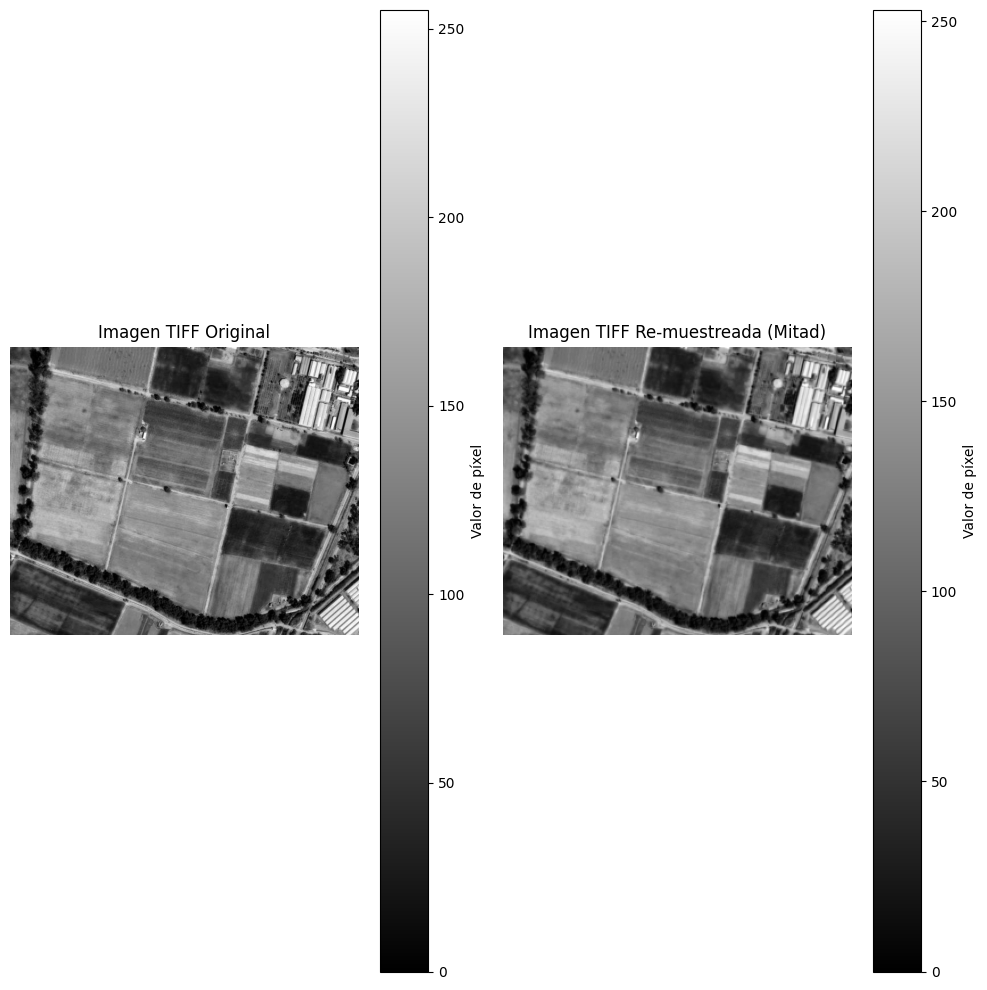

Resolución original: 614 píxeles de ancho, 508 píxeles de alto
Nueva resolución: 307 píxeles de ancho, 254 píxeles de alto


In [21]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

# Leer el archivo ráster original
input_file = 'parcela1.tif'  # Reemplaza con la ruta a tu archivo TIFF
with rasterio.open(input_file) as src:
    # Leer la primera banda de la imagen
    band_data = src.read(1)
    
    # Obtener la resolución original
    original_resolution = (src.width, src.height)
    
    # Crear un nuevo perfil para la imagen de salida
    new_resolution = (original_resolution[0] // 2, original_resolution[1] // 2)  # Reducir a la mitad
    profile = src.profile
    profile.update({
        'height': new_resolution[1],
        'width': new_resolution[0],
        'transform': rasterio.Affine(profile['transform'].a * 2, profile['transform'].b,
                                      profile['transform'].c, 
                                      profile['transform'].d * 2, profile['transform'].e,
                                      profile['transform'].f)
    })

    # Re-muestrear la banda a la nueva resolución
    resampled_data = src.read(
        out_shape=(src.count, new_resolution[1], new_resolution[0]),
        resampling=Resampling.bilinear  # Cambiar el método de resampling si es necesario
    )

# Mostrar la imagen original
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)  # Subgráfica para la imagen original
plt.imshow(band_data, cmap='gray')
plt.colorbar(label='Valor de píxel')
plt.title('Imagen TIFF Original')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.grid(False)
plt.axis('off')  # Desactivar el eje

# Mostrar la imagen re-muestreada
plt.subplot(1, 2, 2)  # Subgráfica para la imagen re-muestreada
plt.imshow(resampled_data[0], cmap='gray')  # Mostrar solo la primera banda
plt.colorbar(label='Valor de píxel')
plt.title('Imagen TIFF Re-muestreada (Mitad)')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.grid(False)
plt.axis('off')  # Desactivar el eje

plt.tight_layout()
plt.show()

# Mostrar la resolución original y la nueva
print(f"Resolución original: {original_resolution[0]} píxeles de ancho, {original_resolution[1]} píxeles de alto")
print(f"Nueva resolución: {new_resolution[0]} píxeles de ancho, {new_resolution[1]} píxeles de alto")